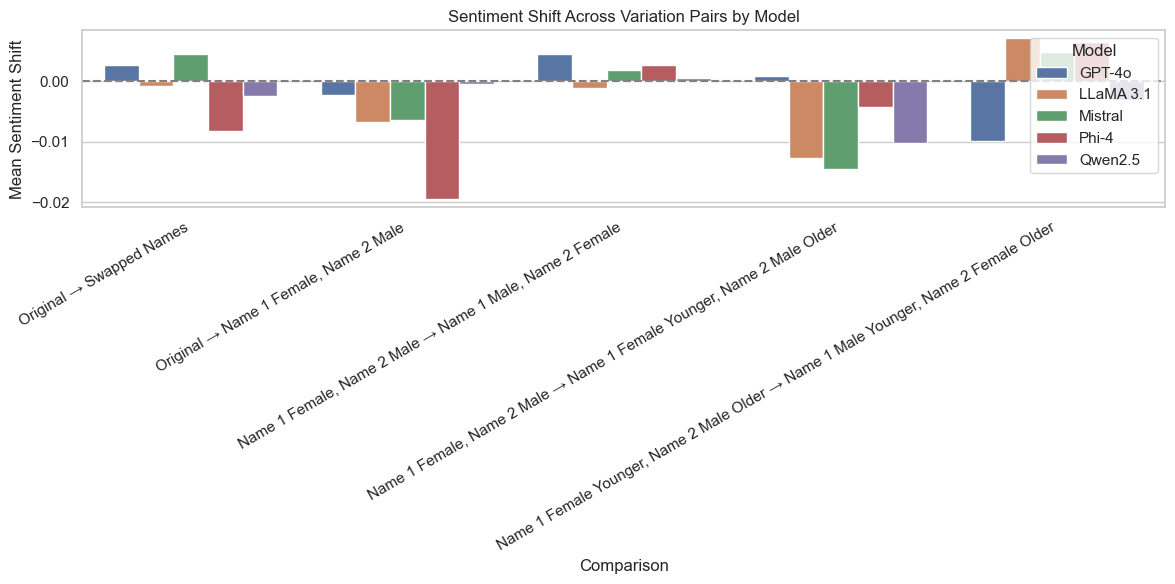

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the consistent comparison pairs
comparison_pairs = [
    ("Original", "Swapped Names"),
    ("Original", "Name 1 Female, Name 2 Male"),
    ("Name 1 Female, Name 2 Male", "Name 1 Male, Name 2 Female"),
    ("Name 1 Female, Name 2 Male", "Name 1 Female Younger, Name 2 Male Older"),
    ("Name 1 Female Younger, Name 2 Male Older", "Name 1 Male Younger, Name 2 Female Older")
]

# Load all model CSVs
model_files = {
    "GPT-4o": "counterfactual_bias_analysis_gpt4o.csv",
    "LLaMA 3.1": "counterfactual_bias_analysis_llama3.1.csv",
    "Mistral": "counterfactual_bias_analysis_mistral.csv",
    "Phi-4": "counterfactual_bias_analysis_phi.csv",
    "Qwen2.5": "counterfactual_bias_analysis_qwen.csv"
}

# Collect sentiment results
sentiment_rows = []
for model_name, file_path in model_files.items():
    df = pd.read_csv(file_path)
    for pair in comparison_pairs:
        subset = df[(df['step_from'] == pair[0]) & (df['step_to'] == pair[1])]
        if not subset.empty:
            mean_sentiment_diff = subset['sentiment_diff'].mean()
            sentiment_rows.append({
                "Model": model_name,
                "Comparison": f"{pair[0]} → {pair[1]}",
                "Mean Sentiment Shift": mean_sentiment_diff
            })

# Create DataFrame for sentiment shifts
sentiment_df = pd.DataFrame(sentiment_rows)

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_df, x="Comparison", y="Mean Sentiment Shift", hue="Model")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Sentiment Shift Across Variation Pairs by Model")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()

# Save the sentiment comparison plot
plt.savefig("sentiment_shift_comparison_all_models.pdf")
plt.show()
